In [1]:
import numpy as np
import gpflow
import tensorflow as tf
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
import scipy.optimize

import gpr
import mcmc

W0712 14:44:23.286036 140668862351168 deprecation_wrapper.py:119] From /home/fortino/anaconda3/lib/python3.7/site-packages/gpflow/session_manager.py:31: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0712 14:44:23.293637 140668862351168 deprecation_wrapper.py:119] From /home/fortino/anaconda3/lib/python3.7/site-packages/gpflow/misc.py:27: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0712 14:44:24.111353 140668862351168 deprecation_wrapper.py:119] From /home/fortino/anaconda3/lib/python3.7/site-packages/gpflow/saver/coders.py:80: The name tf.data.Iterator is deprecated. Please use tf.compat.v1.data.Iterator instead.

W0712 14:44:29.853068 140668862351168 logger.py:200] AstropyDeprecationWarning: astropy.extern.six will be removed in 4.0, use the six module directly if it is still needed


In [53]:
GP = gpr.GPR(
    '/data4/paper/fox/DES/austinFull.fits',
    500,
    sample=None,
    verbose=False,
    eps=0,
    test_size=0.2,
    random_state=0,
    synth=True,
    synth_params=np.array([400, 0.1, 0.2, np.pi/3]),
    nSynth=2000
)

In [56]:
def LML(theta, GP=GP):
    print(theta)
    GP.fit(theta)
    LML = GP.get_LML()
    return -LML
LML0 = LML(GP.synth_params)
LML0

[4.00000000e+02 1.00000000e-01 2.00000000e-01 1.04719755e+00]


3987.5786120986168

In [55]:
bounds = np.array([(1e-10, 1e5), (1e-10, 100), (1e-10, 100), (-np.pi, np.pi)])
theta0 = np.array([400, 0.1, 0.5, np.pi/2])
result = scipy.optimize.minimize(LML, theta0, method='SLSQP', bounds=bounds, options={'eps': 1e-4})
print()
print(GP.synth_params)

[4.00000000e+02 1.00000000e-01 5.00000000e-01 1.57079633e+00]
[4.00000000e+02 1.00000000e-01 5.00000000e-01 1.57079633e+00]
[4.00000100e+02 1.00000000e-01 5.00000000e-01 1.57079633e+00]
[4.00000000e+02 1.00100000e-01 5.00000000e-01 1.57079633e+00]
[4.00000000e+02 1.00000000e-01 5.00100000e-01 1.57079633e+00]
[4.00000000e+02 1.00000000e-01 5.00000000e-01 1.57089633e+00]
[ 4.15728268e+02  9.99999944e-11  1.00000008e-10 -3.14159265e+00]
[ 4.08568074e+02  4.55243642e-02  2.27621821e-01 -9.96307535e-01]
[ 4.08568074e+02  4.55243642e-02  2.27621821e-01 -9.96307535e-01]
[ 4.08568174e+02  4.55243642e-02  2.27621821e-01 -9.96307535e-01]
[ 4.08568074e+02  4.56243642e-02  2.27621821e-01 -9.96307535e-01]
[ 4.08568074e+02  4.55243642e-02  2.27721821e-01 -9.96307535e-01]
[ 4.08568074e+02  4.55243642e-02  2.27621821e-01 -9.96207535e-01]
[ 5.12901196e+02  4.80563023e+00  2.24390819e-01 -3.14159265e+00]
[ 4.21633394e+02  6.41617943e-01  2.27217212e-01 -1.26495506e+00]
[ 4.09874606e+02  1.05133722e-01  

In [45]:
(result.x - theta) / theta

/home/fortino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.01744378, 4.25732933, 1.10801411,       -inf])

In [8]:
def plot_LMLs(low, high, num, theta0, ind, LML0, param):
    LMLs = []
    X = np.linspace(low, high, num=num)
    for j, i in enumerate(X):
        thetai = theta0.copy()
        thetai[ind] = i
        try:
            LMLs.append(LML(thetai))
        except:
            break

    plt.title("Parameter vs Log Marginal Likelihood")
    plt.ylabel("Log Marginal Likelihood")
    plt.xlabel(f"Parameter: {param}")
    if LML0: plt.axhline(LML0)
    plt.plot(X[:len(LMLs)], LMLs)
    plt.show()
    print(np.max(LMLs), X[np.argmax(LMLs)])

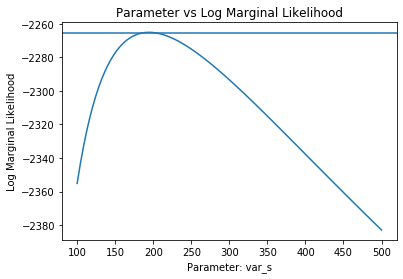

-2264.9958089216016 192.92929292929296


/home/fortino/DESworkspace/gpr.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  a = np.cos(phi)**2 / (2 * sigma_x**2) + np.sin(phi)**2 / (2 * sigma_y**2)
/home/fortino/DESworkspace/gpr.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  b = - np.sin(2 * phi) / (4 * sigma_x**2) + np.sin(2 * phi) / (4 * sigma_y**2)
/home/fortino/DESworkspace/gpr.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  c = np.sin(phi)**2 / (2 * sigma_x**2) + np.cos(phi)**2 / (2 * sigma_y**2)
/home/fortino/DESworkspace/gpr.py:102: RuntimeWarning: invalid value encountered in multiply
  uu = a * (uu1 - uu2)**2
/home/fortino/DESworkspace/gpr.py:103: RuntimeWarning: invalid value encountered in multiply
  vv = c * (vv1 - vv2)**2
/home/fortino/DESworkspace/gpr.py:104: RuntimeWarning: invalid value encountered in multiply
  uv = 2 * b * (uu1 - uu2)*(vv1 - vv2)
/home/fortino/DESworkspace/gpr.py:106: RuntimeWarning: invalid value encountered in add
  K = var_s 

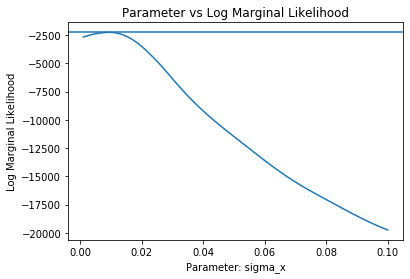

-2264.719500057953 0.009090909090909094


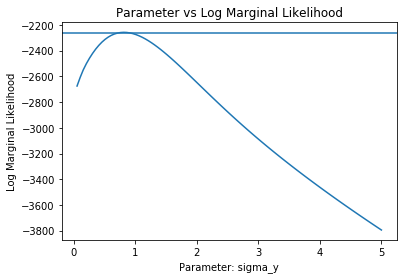

-2258.444274901558 0.808080808080808


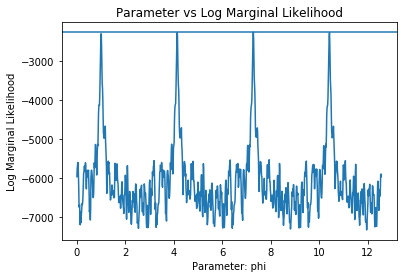

-2265.124203312601 7.283211797511472


In [5]:
theta = np.array([200, 0.009, 0.7, 1])
plot_LMLs(100, 500, 100, theta, 0, LML0, 'var_s')

theta = np.array([200, 0.009, 0.7, 1])
plot_LMLs(0.1, 0, 100, theta, 1, LML0, 'sigma_x')

theta = np.array([200, 0.009, 0.7, 1])
plot_LMLs(5, 0, 100, theta, 2, LML0, 'sigma_y')

theta = np.array([200, 0.009, 0.7, 1])
plot_LMLs(0, 4*np.pi, 1000, theta, 3, LML0, 'phi')

In [5]:
sample = np.array([-0.5, 0, 0, 0.5])
# sample = None
GP = gpr.GPR(
    '/data4/paper/fox/DES/austinFull.fits',
    500,
    sample=sample,
    verbose=False,
    eps=0,
    test_size=0.2,
    random_state=0
)

In [6]:
def LML(theta, GP=GP):
    GP.fit(theta)
    LML = GP.get_LML()
    return LML
theta0 = np.array([400, 0.02, 0.02, 0])
LML0 = LML(theta0)

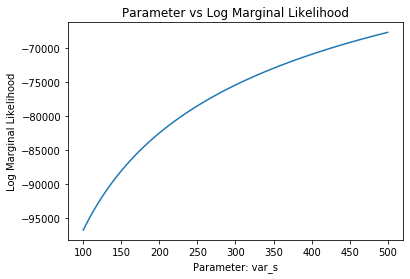

-67647.44647815298 500.0


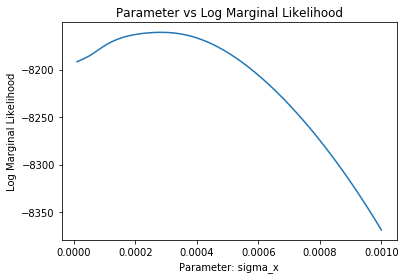

-8160.895491585441 0.00028282828282828287


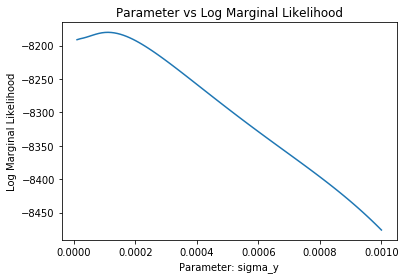

-8180.218700996149 0.00011111111111111109


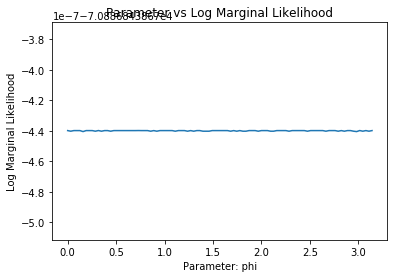

-70886.8438674399 0.3173325912716963


In [11]:
theta = np.array([400, 0.02, 0.02, 0])
plot_LMLs(100, 500, 100, theta, 0, None, 'var_s')

theta = np.array([400, 0.02, 0.02, 0])
plot_LMLs(0.001, 0, 100, theta, 1, None, 'sigma_x')

theta = np.array([400, 0.02, 0.02, 0])
plot_LMLs(0.001, 0, 100, theta, 2, None, 'sigma_y')



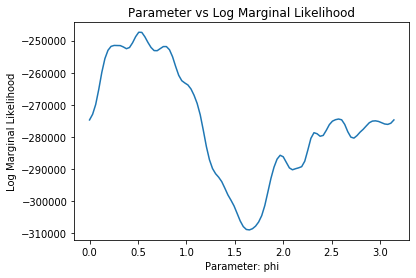

-247371.77370770703 0.5077321460347141


In [9]:
theta = np.array([400, 0.02, 0.1, 0])
plot_LMLs(0, np.pi, 100, theta, 3, None, 'phi')

In [15]:
import forAustin as fa
import astropy.io.fits as pf

In [16]:
dfile = '/data4/paper/fox/DES/austinFull.fits'
fits = pf.open(dfile)

In [17]:
single = fa.getExposure(fits, 500, polyOrder=3)

RMSx, RMSy, noise: 32.865448803461014 17.353018811972362 0.7467741330172585


(0, 0.5)

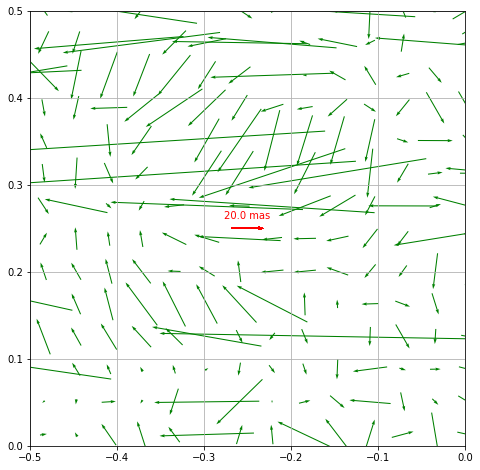

In [22]:
plt.figure(figsize=(8,8))
dx,dy,u,v, wt = fa.residInPixels(single, binpix=512)
plt.xlim(-0.5,0.)
plt.ylim(0,0.5)

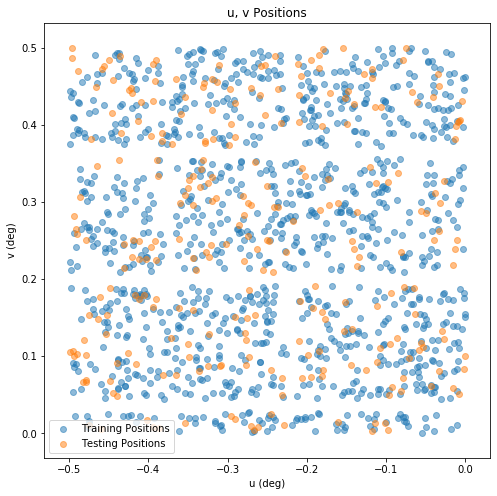

In [23]:
GP.plot_uv()

In [24]:
GP.fits

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fefb4791f28>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fefb02fac18>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fefb0304b70>]

In [27]:
GP.fits[2].columns

ColDefs(
    name = 'exposure'; format = 'I'
    name = 'matchID'; format = 'J'
    name = 'u'; format = 'D'
    name = 'v'; format = 'D'
    name = 'dx'; format = 'D'
    name = 'dy'; format = 'D'
    name = 'measErr'; format = 'D'
    name = 'hasGaia'; format = 'L'
)

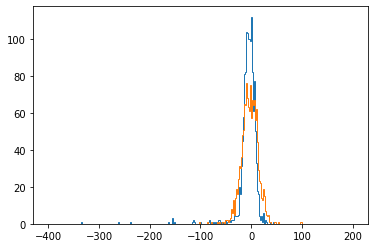

In [34]:
plt.hist(GP.Y[:, 0], bins=300,histtype='step',range=(-400,200))
plt.hist(GP.Y[:, 1], bins=300,histtype='step',range=(-400,200))
plt.show()